In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from google.colab import files


uploaded = files.upload()


Saving advertising (1).csv to advertising (1).csv


In [3]:
df = pd.read_csv("advertising (1).csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df.shape

(1000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
##1. check missing values
df.isnull().sum()


Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [7]:
# Descriptive Statistics
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00,15.85,32.60,51.36,68.22,78.55,91.43
Age,1000.0,36.01,8.79,19.00,29.00,35.00,42.00,61.00
Area Income,1000.0,55000.00,13414.63,13996.50,47031.80,57012.30,65470.63,79484.80
Daily Internet Usage,1000.0,180.00,43.90,104.78,138.83,183.13,218.79,269.96
Male,1000.0,0.48,0.50,0.00,0.00,0.00,1.00,1.00
Clicked on Ad,1000.0,0.50,0.50,0.00,0.00,0.50,1.00,1.00


Text(0, 0.5, 'Frequency')

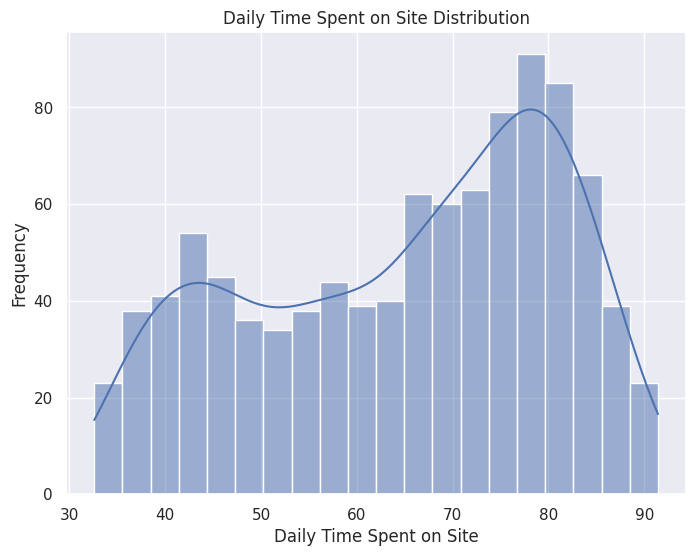

In [8]:

# Plot 1: Histogram of 'Daily Time Spent on Site'
plt.figure(figsize=(8, 6))
sns.histplot(df['Daily Time Spent on Site'], bins=20, kde=True)
plt.title('Daily Time Spent on Site Distribution')
plt.xlabel('Daily Time Spent on Site')
plt.ylabel('Frequency')



/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0.5, 1.0, 'Age Distribution (Boxplot)')

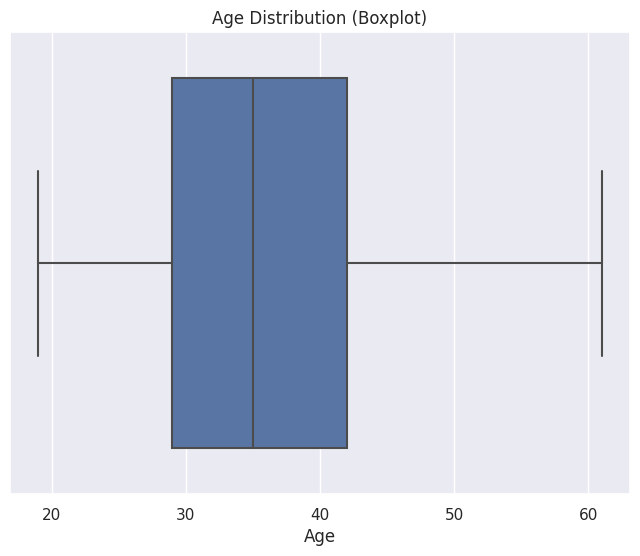

In [ ]:
# Plot 2: Boxplot of 'Age'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', data=df, orient='v')
plt.title('Age Distribution (Boxplot)')


Text(0, 0.5, 'Daily Internet Usage')

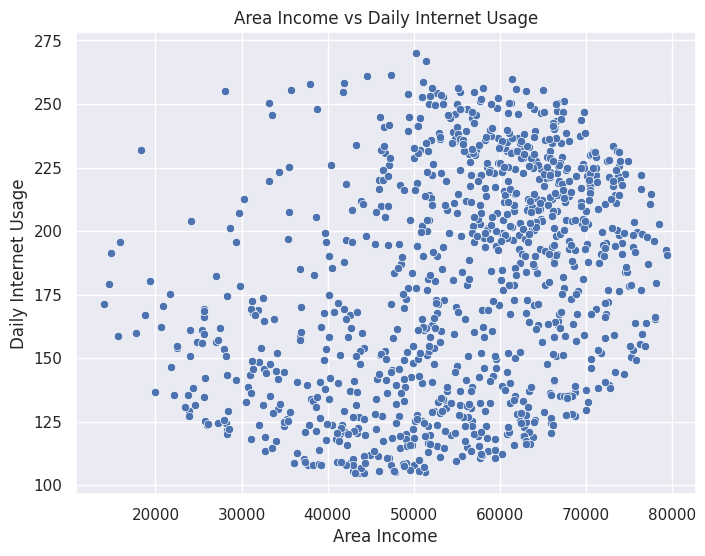

In [ ]:
# Plot 3: Scatter plot of 'Area Income' vs 'Daily Internet Usage'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Area Income', y='Daily Internet Usage', data=df)
plt.title('Area Income vs Daily Internet Usage')
plt.xlabel('Area Income')
plt.ylabel('Daily Internet Usage')


Text(0.5, 1.0, 'Gender Count')

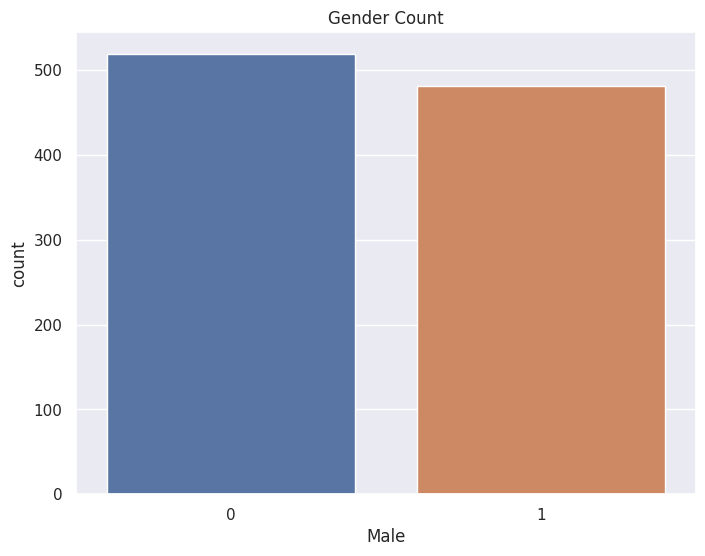

In [ ]:
# Plot 4: Countplot of 'Male' (Gender)
plt.figure(figsize=(8, 6))
sns.countplot(x='Male', data=df)
plt.title('Gender Count')


Text(0.5, 1.0, 'Clicked on Ad')

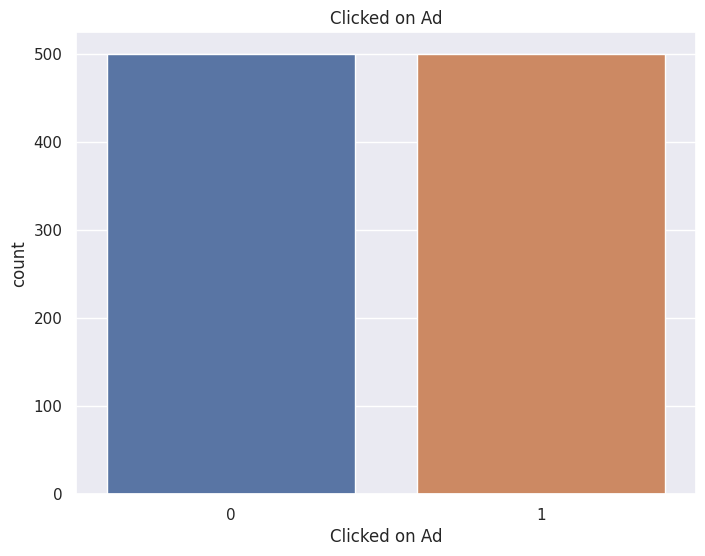

In [ ]:

# Plot 5: Countplot of Clicked on Ad
plt.figure(figsize=(8, 6))
sns.countplot(x='Clicked on Ad', data=df)
plt.title('Clicked on Ad')


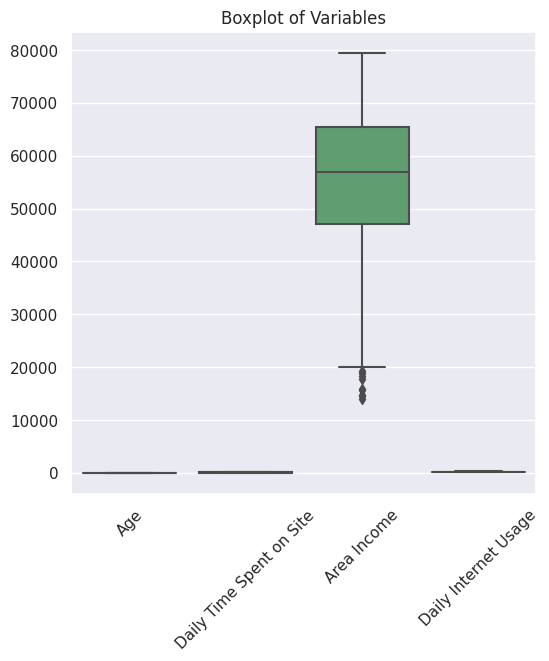

In [10]:
#outlier detection
# Select the variables of interest
variables = ["Age", "Daily Time Spent on Site", "Area Income", "Daily Internet Usage"]
# Create a boxplot for each variable to visualize potential outliers
plt.figure(figsize=(6, 6))
sns.boxplot(data=df[variables])
plt.xticks(rotation=45)
plt.title('Boxplot of Variables')
plt.show()

<ipython-input-11-238d2432648e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr(method = 'pearson')


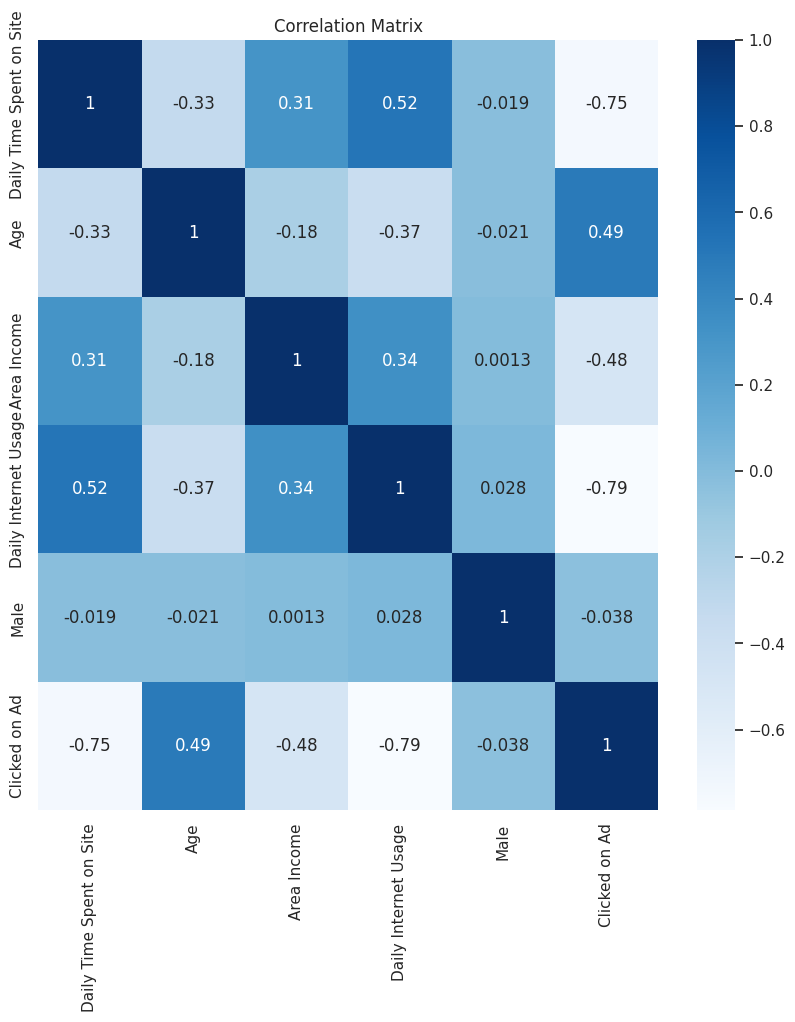

In [11]:
#correlation matrix
correlation = df.corr(method = 'pearson')
correlation

#Plot the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

In [14]:
## spliting data to train and test set
features = df.drop('Clicked on Ad', axis=1)
target = df['Clicked on Ad']

Counter(target)

Counter({0: 500, 1: 500})

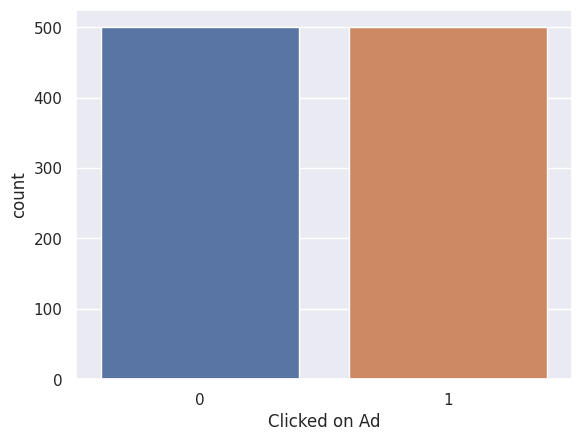

In [15]:
sns.countplot(data=df, x="Clicked on Ad")
plt.show()

In [16]:
#Resample data

from imblearn.over_sampling import RandomOverSampler

sam = RandomOverSampler(random_state=42)

features, target = sam.fit_resample(features, target)

In [17]:
from collections import Counter

Counter(target)

Counter({0: 500, 1: 500})

In [18]:
#Text Encoding with Get Dummies
data_encoded = pd.get_dummies(features, drop_first=True)
data_encoded.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Ad Topic Line_Adaptive asynchronous attitude,Ad Topic Line_Adaptive context-sensitive application,Ad Topic Line_Adaptive contextually-based methodology,Ad Topic Line_Adaptive demand-driven knowledgebase,Ad Topic Line_Adaptive uniform capability,...,Timestamp_2016-07-21 23:14:35,Timestamp_2016-07-22 07:44:43,Timestamp_2016-07-22 11:05:10,Timestamp_2016-07-23 04:04:42,Timestamp_2016-07-23 04:37:05,Timestamp_2016-07-23 05:21:39,Timestamp_2016-07-23 06:18:51,Timestamp_2016-07-23 11:46:28,Timestamp_2016-07-23 14:47:23,Timestamp_2016-07-24 00:22:16
0,68.95,35,61833.90,256.09,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,31,68441.85,193.77,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,26,59785.94,236.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
from sklearn.feature_selection import SelectKBest

fe = SelectKBest(k=5).set_output(transform="pandas")
selected_features = fe.fit_transform(data_encoded, target)

selected_features.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Country_Ethiopia
0,68.95,35.0,61833.90,256.09,0.0
1,80.23,31.0,68441.85,193.77,0.0
2,69.47,26.0,59785.94,236.50,0.0
3,74.15,29.0,54806.18,245.89,0.0
4,68.37,35.0,73889.99,225.58,0.0


In [22]:
selected_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Country_Ethiopia          1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


In [23]:
#Transform Target
from sklearn.preprocessing import LabelEncoder

target =  LabelEncoder()\
          .fit_transform(target)

In [25]:
#Train and Test Data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_encoded, target,
                                                    test_size=0.2, shuffle=True,
                                                    random_state=42, stratify=target)

In [26]:
#Scaling data
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler().set_output(transform="pandas")
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [28]:
#Modeling

#ogistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

lr = LogisticRegression(max_iter=1000, solver='liblinear')
lr.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [29]:
preds = lr.predict(x_test_scaled)

acc_score = accuracy_score(y_test, preds)
prec_score = precision_score(y_test, preds)
rec_score = recall_score(y_test, preds)
F1_score = f1_score(y_test, preds)


print(f"The accuracy score of the model is {acc_score}")
print(f"The precision score of the model is {prec_score}")
print(f"The recall score of the model is {rec_score}")
print(f"The f1 score score of the model is {F1_score}")

print(classification_report(y_test, preds))

The accuracy score of the model is 0.975
The precision score of the model is 0.9896907216494846
The recall score of the model is 0.96
The f1 score score of the model is 0.9746192893401014
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       100
           1       0.99      0.96      0.97       100

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



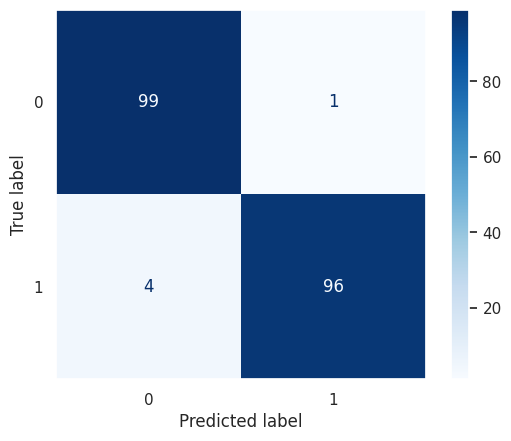

In [30]:
def plot_conf_matrix():
    cm = confusion_matrix(y_test, preds)
    cm = ConfusionMatrixDisplay(cm)
    cm.plot(cmap="Blues")
    plt.grid(False)

plot_conf_matrix()

In [31]:
#Logistic regression parametr tuning

from sklearn.model_selection import GridSearchCV

params = {

    'C':[1,5, 10, 20],
    'penalty':['l1', 'l2']
}

lr_grid = GridSearchCV(lr, params, n_jobs=-1)
lr_grid.fit(x_train_scaled, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [1, 5, 10, 20], 'penalty': ['l1', 'l2']})

In [32]:
def grid_search_tuning_results(model):
    girdpreds = model.best_estimator_.predict(x_test_scaled)
    cm = confusion_matrix(y_test, girdpreds)

    print("accuracy:",accuracy_score(y_test, girdpreds))
    print("precision:",precision_score(y_test, girdpreds))
    print("recall:",recall_score(y_test, girdpreds))
    print("F1 score:",f1_score(y_test, girdpreds))
    print("specifity", ((cm[1,1])/(cm[1,1]+cm[0,1])))

grid_search_tuning_results(lr_grid)

accuracy: 0.975
precision: 0.9896907216494846
recall: 0.96
F1 score: 0.9746192893401014
specifity 0.9896907216494846


In [33]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [34]:
preds = rf.predict(x_test_scaled)

rf_acc_score = accuracy_score(y_test, preds)
rf_prec_score = precision_score(y_test, preds)
rf_rec_score = recall_score(y_test, preds)
rf_F1_score = f1_score(y_test, preds)


print(f"The accuracy score of the model is {rf_acc_score}")
print(f"The precision score of the model is {rf_prec_score}")
print(f"The recall score of the model is {rf_rec_score}")
print(f"The f1 score score of the model is {rf_F1_score}")

print(classification_report(y_test, preds))

The accuracy score of the model is 0.96
The precision score of the model is 0.9509803921568627
The recall score of the model is 0.97
The f1 score score of the model is 0.9603960396039604
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       100
           1       0.95      0.97      0.96       100

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



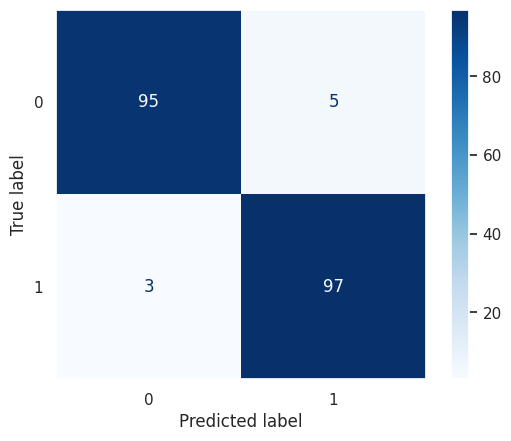

In [35]:
plot_conf_matrix()

In [36]:
#Random Forest parametr tuning
params = {
    'max_depth':[2,3,4,10,20],
    'n_estimators':[50, 100, 120]
}


rf_grid = GridSearchCV(rf, params, cv=2, n_jobs=-1)
rf_grid.fit(x_train_scaled, y_train)
grid_search_tuning_results(rf_grid)

accuracy: 0.96
precision: 0.9693877551020408
recall: 0.95
F1 score: 0.9595959595959594
specifity 0.9693877551020408


In [37]:
##KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

knn.fit(x_train_scaled, y_train)

preds = knn.predict(x_test_scaled)

knn_acc_score = accuracy_score(y_test, preds)
knn_prec_score = precision_score(y_test, preds)
knn_rec_score = recall_score(y_test, preds)
knn_F1_score = f1_score(y_test, preds)


print(f"The accuracy score of the model is {knn_acc_score}")
print(f"The precision score of the model is {knn_prec_score}")
print(f"The recall score of the model is {knn_rec_score}")
print(f"The f1 score score of the model is {knn_F1_score}")

The accuracy score of the model is 0.955
The precision score of the model is 0.989247311827957
The recall score of the model is 0.92
The f1 score score of the model is 0.9533678756476685


In [38]:
params = {
    'n_neighbors':[2,3,4,10,20],
}


knn_grid = GridSearchCV(knn, params, cv=2, n_jobs=-1)
knn_grid.fit(x_train_scaled, y_train)
grid_search_tuning_results(knn_grid)

accuracy: 0.97
precision: 0.9895833333333334
recall: 0.95
F1 score: 0.9693877551020408
specifity 0.9895833333333334


In [39]:
## Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

dt.fit(x_train_scaled, y_train)

preds = dt.predict(x_test_scaled)

dt_acc_score = accuracy_score(y_test, preds)
dt_prec_score = precision_score(y_test, preds)
dt_rec_score = recall_score(y_test, preds)
dt_F1_score = f1_score(y_test, preds)


print(f"The accuracy score of the model is {dt_acc_score}")
print(f"The precision score of the model is {dt_prec_score}")
print(f"The recall score of the model is {dt_rec_score}")
print(f"The f1 score score of the model is {dt_F1_score}")

The accuracy score of the model is 0.96
The precision score of the model is 0.96
The recall score of the model is 0.96
The f1 score score of the model is 0.96


In [40]:
params = {
    'max_depth':[4,10,20, 30],
    'min_samples_split':[2,4,10,15, 20]
}


dt_grid = GridSearchCV(dt, params, cv=2, n_jobs=-1)
dt_grid.fit(x_train_scaled, y_train)
grid_search_tuning_results(dt_grid)

accuracy: 0.96
precision: 0.96
recall: 0.96
F1 score: 0.96
specifity 0.96


Compare Model

In [43]:
models = pd.DataFrame({

    'Model':["Logistic Regression", "Random Forest", "KNN", "Decision Tree"],
    'Accuracy':[acc_score, rf_acc_score, knn_acc_score, dt_acc_score],
    'Precision':[prec_score, rf_prec_score, knn_prec_score, dt_prec_score],
    'Recall':[rec_score, rf_rec_score, knn_rec_score, dt_rec_score],
    'F1 score':[F1_score, rf_F1_score, knn_F1_score, dt_F1_score]
}).round(2)

models['Accuracy'] = models['Accuracy'] * 100
models['Precision'] = models['Precision'] * 100
models['Recall'] = models['Recall'] * 100
models['F1 score'] = models['F1 score'] * 100

models.sort_values('Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1 score
0,Logistic Regression,98.0,99.0,96.0,97.0
1,Random Forest,96.0,95.0,97.0,96.0
2,KNN,96.0,99.0,92.0,95.0
3,Decision Tree,96.0,96.0,96.0,96.0


Feature Importance

In [41]:
! pip install scikit-plot -q

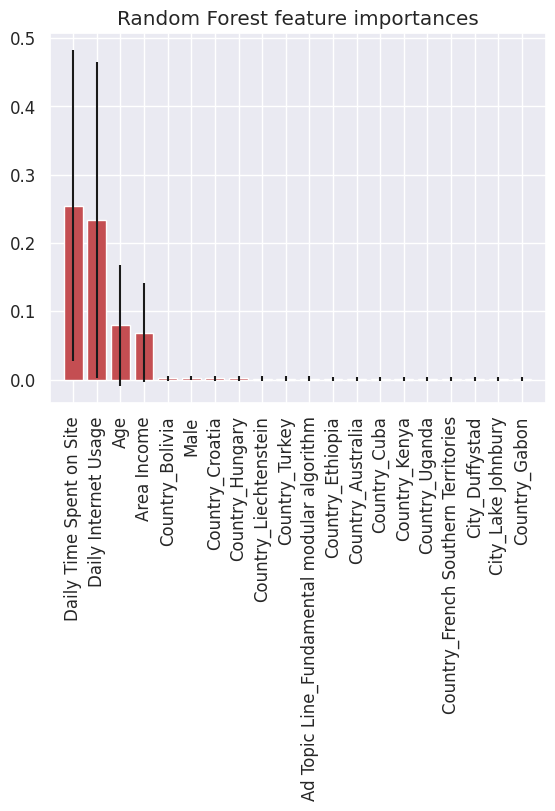

In [42]:
import scikitplot as skplt

skplt.estimators.plot_feature_importances(rf, feature_names=x_train_scaled.columns.to_list(), title="Random Forest feature importances")
plt.xticks(rotation=90)
plt.show()